In [27]:
# In colab please uncomment this to install Atari 
# Box2d is a 2D physics engine.
!pip install box2d-py

In [28]:
# And for visualization on Colab install
!pip install pyglet
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1


In [29]:
import gym

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display as ipythondisplay  ## Needed on colab

In [31]:
## Need to set a virtual Display on colab, else ipythondisplay would not work
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

## Physics Engine

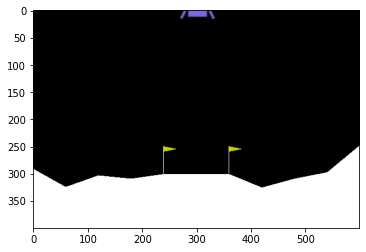

In [32]:
env = gym.make('LunarLander-v2')
obs = env.reset() 
img = env.render(mode='rgb_array')
env.close()
plt.imshow(img)
#ipythondisplay.clear_output(wait=True)  #Colab

# Classic Control 

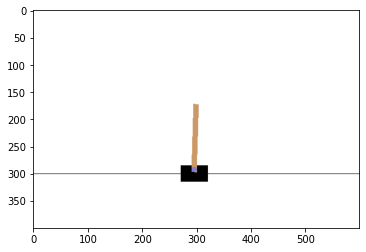

In [33]:
env = gym.make('CartPole-v0')
env.reset()
img = env.render(mode='rgb_array')
env.close()
plt.imshow(img)

## Atari Games

In [34]:
!wget http://www.atarimania.com/roms/Roms.rar
!mkdir /content/ROM/
!unrar e /content/Roms.rar /content/ROM/
!python -m atari_py.import_roms /content/ROM/

--2022-03-25 16:15:37--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11128004 (11M) [application/x-rar-compressed]
Saving to: ‘Roms.rar.1’

Roms.rar.1          100%[===================>]  10.61M   721KB/s    in 16s     

2022-03-25 16:15:53 (688 KB/s) - ‘Roms.rar.1’ saved [11128004/11128004]

mkdir: cannot create directory ‘/content/ROM/’: File exists

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Roms.rar


Would you like to replace the existing file /content/ROM/HC ROMS.zip
11826711 bytes, modified on 2019-12-22 11:24
with a new one
11826711 bytes, modified on 2019-12-22 11:24

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit N


Would you like to replace the existing file /content/ROM/ROMS.zip
8181588 bytes, modified on 2019-12-22 11:23


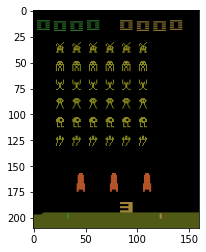

In [35]:
env = gym.make('SpaceInvaders-v0')
env.reset()
img = env.render(mode='rgb_array')
env.close()
plt.imshow(img)

In [36]:
from gym import envs

envall = envs.registry.all()
len(envall)

859

In [37]:
from tqdm import tqdm
List = []
for e in tqdm(envall):
    try:
        env = e.make()
        List.append([e.id, env.observation_space, env.action_space, env.reward_range])
        env.close() 
    except:
        continue     
    


  0%|          | 0/859 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
100%|██████████| 859/859 [02:56<00:00,  4.87it/s]


In [38]:
df = pd.DataFrame(List, columns= ['Environment', 'Observation Space', 'Action Space', 'Reward'])
df.sample(20)

,Environment,Observation Space,Action Space,Reward
163,BerzerkDeterministic-v4,"Box(0, 255, (210, 160, 3), uint8)",Discrete(18),"(-inf, inf)"
520,Pong-v0,"Box(0, 255, (210, 160, 3), uint8)",Discrete(6),"(-inf, inf)"
303,ElevatorAction-ramNoFrameskip-v4,"Box(0, 255, (128,), uint8)",Discrete(18),"(-inf, inf)"
266,Defender-ramNoFrameskip-v0,"Box(0, 255, (128,), uint8)",Discrete(18),"(-inf, inf)"
21,FrozenLake8x8-v0,Discrete(64),Discrete(4),"(0, 1)"
490,NameThisGame-ram-v0,"Box(0, 255, (128,), uint8)",Discrete(6),"(-inf, inf)"
134,BankHeist-ramNoFrameskip-v0,"Box(0, 255, (128,), uint8)",Discrete(18),"(-inf, inf)"
430,Kangaroo-ram-v0,"Box(0, 255, (128,), uint8)",Discrete(18),"(-inf, inf)"
101,Asteroids-v4,"Box(0, 255, (210, 160, 3), uint8)",Discrete(14),"(-inf, inf)"
253,CrazyClimber-ramDeterministic-v4,"Box(0, 255, (128,), uint8)",Discrete(9),"(-inf, inf)"


In [39]:
env = gym.make('MountainCar-v0')
print(f"The Observation space is        {env.observation_space}" )

print(f"Upper Bound for Env Observation {env.observation_space.high}")
print(f"Lower Bound for Env Observation {env.observation_space.low}")
print(f"Action Space                    {env.action_space}")

env.seed(0)
obs = env.reset()
print(f"The initial observation is      {obs}")
# # Take a random actionget the new observation space
new_obs, reward, done, info = env.step(env.action_space.sample())
print(f"The new observation is          {new_obs}")
env.close()

The Observation space is        Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Upper Bound for Env Observation [0.6  0.07]
Lower Bound for Env Observation [-1.2  -0.07]
Action Space                    Discrete(3)
The initial observation is      [-0.58912799  0.        ]
The new observation is          [-5.88639679e-01  4.88309600e-04]


# Working with Wrappers

In [40]:
class ClippedRewards(gym.RewardWrapper):
    def __init__(self, env):
        gym.RewardWrapper.__init__(self, env)
        self.reward_range = (-10,10)

    def reward(self, reward):
        """Clip to {+10, 0, -10} by its sign."""
        return reward if reward >= -10 and reward <= 10 else 10 * np.sign(reward)

In [41]:
env = gym.make("CartPole-v0")
print("Original Rewards:", env.reward_range)
env.close()
env = ClippedRewards(gym.make("CartPole-v0"))
print(f'Clipped reward range: {env.reward_range}')
env.close()


Original Rewards: (-inf, inf)
Clipped reward range: (-10, 10)


# Working with Wrappers

In [42]:
from collections import deque
from gym import spaces
import numpy as np

class ConcatObservations(gym.Wrapper):
    def __init__(self, env, n):
        gym.Wrapper.__init__(self, env)
        shape = env.observation_space.shape
        self.n = n
        self.frames = deque([], maxlen=n)
        self.observation_space = \
            spaces.Box(low=0, high=255, shape=((n,) + shape), dtype=env.observation_space.dtype)
    def reset(self):
        obs = self.env.reset()
        for _ in range(self.n):
            self.frames.append(obs)
        return self._get_obs()

    def step(self, action):
        obs, reward, done, info = self.env.step(action)
        self.frames.append(obs)
        return self._get_obs(), reward, done, info

    def _get_obs(self):
        return np.array(self.frames)

In [43]:
env = gym.make("BreakoutNoFrameskip-v4")
print(f"The original observation space is  {env.observation_space}")
env = ConcatObservations(env, 4)
print(f"The new observation space is  {env.observation_space}")


The original observation space is  Box(0, 255, (210, 160, 3), uint8)
The new observation space is  Box(0, 255, (4, 210, 160, 3), uint8)


In [44]:
env.reset()
obs, _, _, _  = env.step(env.action_space.sample())
print(f"Observation after taking a random step is  {obs.shape}")
env.close()

Observation after taking a random step is  (4, 210, 160, 3)


# Monitors for saving videos

In [45]:
import gym
from gym.wrappers import Monitor
#env = gym.make('CartPole-v0')
env = Monitor(gym.make('CartPole-v0'), 'recording', force=True)
state = env.reset()
done = False

while not done:
    action = env.action_space.sample()
    state_next, reward, done, info = env.step(action)
    
env.close()


In [48]:
# On Colab
from IPython.display import HTML
from base64 import b64encode
mp4 = open('recording/openaigym.video.3.59.video000000.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


## Visualize Animation

In [49]:
import gym
import matplotlib.pyplot as plt
import matplotlib.animation as animation

env = gym.make('Pong-v0')
obs = env.reset()
frames = [] # array to store state space at each step 
for _ in range(300):
    frames.append(env.render(mode='rgb_array')) 
    obs,reward,done, _ = env.step(env.action_space.sample()) 
    if done:
        break


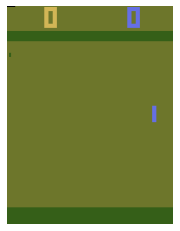

In [50]:
patch = plt.imshow(frames[0])
plt.axis('off')
def animate(i):
    patch.set_data(frames[i])
anim = animation.FuncAnimation(plt.gcf(), animate, \
                               frames=len(frames), interval=100)
#anim.save('random_agent.gif', writer='imagemagick')

![](https://github.com/Educat8n/Reinforcement-Learning-for-Game-Playing-and-More/blob/main/images/random_agent.gif?raw=1)

In [51]:
# For Colab
from IPython.display import HTML
HTML(anim.to_html5_video())